Problem – August 11-08
Task:
Develop an S-I-R (Susceptible–Infected–Recovered) profile for the coming 10 days based on the following model:

       1- Start Population - a Random Number >=1000
       2- Start Infected - a random number less than Start Population 
       3- beta : Infection Rate between (0,1) , : Random Number : 
       4- Gamma : Recover Rate between ( 0, 1) : Random Number : 
Write python code and  plot next 10 days S-I-R Profile , this should be function so that all parameters could be adjusted to check scenarios 




In [2]:
import random
import matplotlib.pyplot as plt

In [5]:
def simulate_sir(days=10, N=None, I0=None, beta=None, gamma=None, seed=None, show_plot=True):
    """
    Simulates an SIR (Susceptible–Infected–Recovered) model for a given number of days.

    Parameters:
        days      : int   → Number of days to simulate (default: 10)
        N         : int   → Total population (>= 1000). If None, generated randomly.
        I0        : int   → Initial infected (< N). If None, generated randomly.
        beta      : float → Infection rate between (0, 1). If None, generated randomly.
        gamma     : float → Recovery rate between (0, 1). If None, generated randomly.
        seed      : int   → Random seed for reproducibility (default: None)
        show_plot : bool  → Whether to display the plot (default: True)
    """

    # --- Step 1: Optional reproducibility ---
    # If a seed is provided, it ensures we get the same random values every run
    if seed is not None:
        random.seed(seed)

    # --- Step 2: Assign or randomize parameters ---
    # If the user doesn't pass values, we generate them randomly
    if N is None:
        N = random.randint(1000, 5000)  # Total population ≥ 1000
    if I0 is None:
        I0 = random.randint(1, N - 1)   # Initial infected must be less than population
    if beta is None:
        beta = random.uniform(0, 1)     # Infection rate between 0 and 1
    if gamma is None:
        gamma = random.uniform(0, 1)    # Recovery rate between 0 and 1

    # --- Step 3: Initial state ---
    S = N - I0  # Initially susceptible population
    I = I0      # Initially infected population
    R = 0       # Initially recovered population

    # Lists to store daily values for plotting and output
    S_list = [S]
    I_list = [I]
    R_list = [R]

    # --- Step 4: Simulation loop ---
    # Loop for each day and update S, I, R values based on the SIR equations
    for _ in range(days):
        # New infections depend on current susceptible & infected people
        new_infected = beta * S * I / N
        # New recoveries depend on current infected people
        new_recovered = gamma * I

        # Update each group
        S -= new_infected
        I += new_infected - new_recovered
        R += new_recovered

        # Store updated values for the day
        S_list.append(S)
        I_list.append(I)
        R_list.append(R)

    # --- Step 5: Plotting results (if enabled) ---
    if show_plot:
        days_range = list(range(days + 1))  # X-axis for days
        plt.figure(figsize=(8, 5))          # Set plot size

        # Plot each curve: S, I, and R
        for label, data, color in zip(
            ["Susceptible", "Infected", "Recovered"],
            [S_list, I_list, R_list],
            ["blue", "red", "green"]
        ):
            plt.plot(days_range, data, label=label, marker='o', color=color)
            # Add data labels to each point
            for x, y in zip(days_range, data):
                plt.text(x, y, f"{int(y)}", fontsize=8, ha='center', va='bottom')

        # Add titles, labels, legend, and grid
        plt.xlabel("Days")
        plt.ylabel("Population Count")
        plt.title(f"SIR Model (N={N}, I0={I0}, β={beta:.3f}, γ={gamma:.3f})")
        plt.legend()
        plt.grid(True)
        plt.show()

    # --- Step 6: Return results as a dictionary ---
    # This allows further analysis or saving the results
    return {
        "Population": N,
        "Initial Infected": I0,
        "Beta": beta,
        "Gamma": gamma,
        "Susceptible": S_list,
        "Infected": I_list,
        "Recovered": R_list
    }


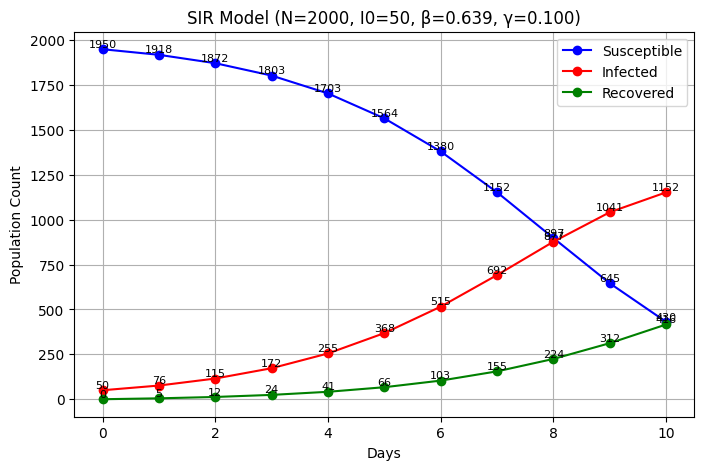

{'Population': 2000,
 'Initial Infected': 50,
 'Beta': 0.6394267984578837,
 'Gamma': 0.1,
 'Susceptible': [1950,
  1918.827943575178,
  1872.0982909266393,
  1803.0964912392046,
  1703.506062099824,
  1564.584980988271,
  1380.2611985288715,
  1152.5735901453381,
  897.556774229944,
  645.6439746309743,
  430.55515774464845],
 'Infected': [50,
  76.17205642482183,
  115.28450343087856,
  172.75785277522533,
  255.07249663708345,
  368.4863280849283,
  515.9614777358348,
  692.0529383457847,
  877.8644604266003,
  1041.99081398291,
  1152.8805494709447],
 'Recovered': [0,
  5.0,
  12.617205642482183,
  24.145655985570038,
  41.421441263092575,
  66.92869092680093,
  103.77732373529375,
  155.37347150887723,
  224.5787653434557,
  312.36521138611573,
  416.56429278440675]}

In [8]:
# Random parameters
#simulate_sir()

# Controlled parameters with reproducibility
simulate_sir(days=10, N=2000, I0=50, beta=None, gamma=0.1, seed=42)


### Conclusion:
With β ≈ 0.639 and γ = 0.1, the infection spreads very rapidly, rising from 50 to over 1150 cases in just 10 days. The susceptible population falls sharply from 1950 to about 431, while recoveries increase but remain far lower than infections. This indicates a fast-moving outbreak still in an aggressive growth phase, likely to peak beyond the observed 10-day window.